<a href="https://colab.research.google.com/github/chi-hun/kaggle/blob/main/Kannada_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Kannada MNIST https://www.kaggle.com/competitions/Kannada-MNIST/overview

In [ ]:
!pip install kaggle

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers

# 데이터 로드

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"huunnii","key":"70c5b2314ae139ef812cf3f144c8f227"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c Kannada-MNIST

 48% 6.00M/12.4M [00:00<00:00, 62.8MB/s]
100% 12.4M/12.4M [00:00<00:00, 108MB/s] 


In [7]:
!unzip /content/Kannada-MNIST.zip

Archive:  /content/Kannada-MNIST.zip
  inflating: Dig-MNIST.csv           
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [8]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
vaid = pd.read_csv('/content/Dig-MNIST.csv')

# EDA

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 359.3 MB


In [14]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
x_train = train.copy()
y_train = x_train.pop('label')

In [17]:
x_train.shape, y_train.shape

((60000, 784), (60000,))

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 785 entries, id to pixel783
dtypes: int64(785)
memory usage: 29.9 MB


In [20]:
test.head(2)

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
x_test = test.copy()
_ = x_test.pop('id')

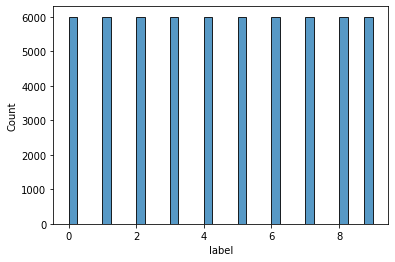

In [39]:
sns.histplot(y_train)
plt.show()

In [12]:
y_train = np.array(y_train)

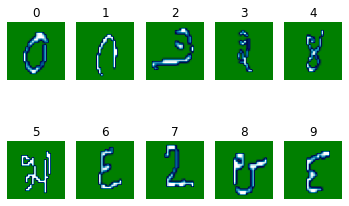

In [41]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(y_train[i])
    plt.axis(False)
    plt.imshow(np.array(x_train.iloc[i,:]).reshape(28,28), cmap='ocean')
plt.show()

In [13]:
x_train_re = np.array(x_train).reshape(-1,28,28,1)
x_test_re = np.array(x_test).reshape(-1,28,28,1)
x_train_re.shape, x_test_re.shape

((60000, 28, 28, 1), (5000, 28, 28, 1))

In [14]:
img_size = 28

# CNN

In [58]:
def model_make1():
    inputs = layers.Input(shape=(img_size, img_size,1))
    x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
    x = layers.experimental.preprocessing.RandomFlip('horizontal')(x)
    x = layers.experimental.preprocessing.RandomRotation(0.1)(x)
    x = layers.experimental.preprocessing.RandomZoom(0.1)(x)
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(32, 3, activation='relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(64, 3, activation='relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(128, 3, activation='relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.1)(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    x = layers.BatchNormalization()(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

In [59]:
model = model_make1()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 random_flip_4 (RandomFlip)  (None, 28, 28, 1)         0         
                                                                 
 random_rotation_4 (RandomRo  (None, 28, 28, 1)        0         
 tation)                                                         
                                                                 
 random_zoom_4 (RandomZoom)  (None, 28, 28, 1)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                           

In [85]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [86]:
his = model.fit(x_train_re, y_train, epochs = 10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 234s 155ms/step - loss: 0.5945 - accuracy: 0.8096 - val_loss: 0.0602 - val_accuracy: 0.9815
Epoch 2/10
1500/1500 [==============================] - 227s 152ms/step - loss: 0.1732 - accuracy: 0.9518 - val_loss: 0.0652 - val_accuracy: 0.9814
Epoch 3/10
1500/1500 [==============================] - 228s 152ms/step - loss: 0.1320 - accuracy: 0.9627 - val_loss: 0.0457 - val_accuracy: 0.9871
Epoch 4/10
1500/1500 [==============================] - 227s 151ms/step - loss: 0.1088 - accuracy: 0.9702 - val_loss: 0.0437 - val_accuracy: 0.9868
Epoch 5/10
1500/1500 [==============================] - 226s 151ms/step - loss: 0.0903 - accuracy: 0.9755 - val_loss: 0.0893 - val_accuracy: 0.9791
Epoch 6/10
1500/1500 [==============================] - 226s 151ms/step - loss: 0.0830 - accuracy: 0.9776 - val_loss: 0.0386 - val_accuracy: 0.9890
Epoch 7/10
1500/1500 [==============================] - 227s 151ms/step - loss: 0.0793 - accuracy: 0.9785 - val_

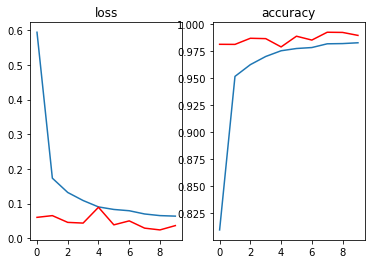

In [88]:
plt.subplot(1,2,1)
plt.title('loss')
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'], 'r')
plt.subplot(1,2,2)
plt.title('accuracy')
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'], 'r')
plt.show()

In [89]:
pre = model.predict(x_test_re)

In [95]:
pre = np.argmax(pre, axis=1)

In [96]:
pre

array([3, 0, 2, ..., 1, 6, 3])

In [98]:
submission = pd.read_csv('/content/sample_submission.csv')
submission['label'] = pre

In [99]:
submission.head()

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7


In [101]:
submission.to_csv('submission.csv', index=False)

# 전이학습(EfficientNetV2B0)


In [15]:
prepro = tf.keras.applications.efficientnet_v2.preprocess_input
base_model = tf.keras.applications.EfficientNetV2B0(include_top=False, weights='imagenet')
base_model.trinable = False

24289280/24274472 [==============================] - 0s 0us/step


In [109]:
def model_make2():
    inputs = layers.Input(shape=(img_size,img_size,3))
    x = layers.experimental.preprocessing.RandomFlip('horizontal')(inputs)
    x = layers.experimental.preprocessing.RandomRotation(0.1)(x)
    x = layers.experimental.preprocessing.RandomZoom(0.1)(x)
    x = prepro(x)
    x = base_model(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    x = layers.BatchNormalization()(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

In [110]:
model = model_make2()
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 random_flip_6 (RandomFlip)  (None, 28, 28, 3)         0         
                                                                 
 random_rotation_6 (RandomRo  (None, 28, 28, 3)        0         
 tation)                                                         
                                                                 
 random_zoom_6 (RandomZoom)  (None, 28, 28, 3)         0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling2d_2   (None, 1280)             0   

In [111]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [112]:
his = model.fit(x_train_re, y_train, epochs = 10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 729s 477ms/step - loss: 0.4491 - accuracy: 0.8697 - val_loss: 0.1047 - val_accuracy: 0.9698
Epoch 2/10
1500/1500 [==============================] - 714s 476ms/step - loss: 0.1775 - accuracy: 0.9552 - val_loss: 0.0968 - val_accuracy: 0.9709
Epoch 3/10
1500/1500 [==============================] - 716s 477ms/step - loss: 0.1406 - accuracy: 0.9653 - val_loss: 0.0723 - val_accuracy: 0.9794
Epoch 4/10
1500/1500 [==============================] - 714s 476ms/step - loss: 0.1239 - accuracy: 0.9695 - val_loss: 0.1180 - val_accuracy: 0.9587
Epoch 5/10
1500/1500 [==============================] - 716s 477ms/step - loss: 0.1126 - accuracy: 0.9720 - val_loss: 0.0832 - val_accuracy: 0.9767
Epoch 6/10
1500/1500 [==============================] - 719s 479ms/step - loss: 0.0957 - accuracy: 0.9765 - val_loss: 0.0352 - val_accuracy: 0.9906
Epoch 7/10
1500/1500 [==============================] - 719s 479ms/step - loss: 0.0850 - accuracy: 0.9789 - val_

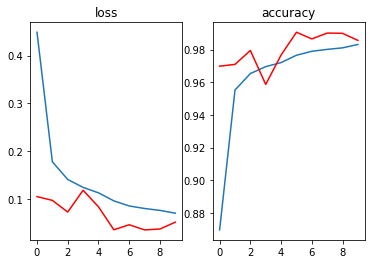

In [113]:
plt.subplot(1,2,1)
plt.title('loss')
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'], 'r')
plt.subplot(1,2,2)
plt.title('accuracy')
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'], 'r')
plt.show()

In [114]:
pre = model.predict(x_test_re)
pre = np.argmax(pre, axis=1)
submission = pd.read_csv('/content/sample_submission.csv')
submission['label'] = pre
submission.to_csv('submission.csv', index=False)

# 전이학습(EfficientNetV2B0, 일부분 학습)

In [16]:
prepro = tf.keras.applications.efficientnet_v2.preprocess_input
base_model = tf.keras.applications.EfficientNetV2B0(include_top=False, weights='imagenet')
base_model.trinable = False

In [17]:
len(base_model.layers)

255

In [18]:
for i in base_model.layers[220:]:
    i.trainable = True

In [19]:
def model_make3():
    inputs = layers.Input(shape=(img_size,img_size,3))
    x = layers.experimental.preprocessing.RandomFlip('horizontal')(inputs)
    x = layers.experimental.preprocessing.RandomRotation(0.1)(x)
    x = layers.experimental.preprocessing.RandomZoom(0.1)(x)
    x = prepro(x)
    x = base_model(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    x = layers.BatchNormalization()(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

In [25]:
model = model_make3()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 28, 28, 3)         0         
                                                                 
 random_rotation_1 (RandomRo  (None, 28, 28, 3)        0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 28, 28, 3)         0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling2d_1   (None, 1280)             0   

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [27]:
erend = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3, min_delta = 0.01)
with tf.device('/GPU:0'):
    his = model.fit(x_train_re, y_train, epochs = 30, validation_split=0.2, callbacks=[erend])

Epoch 1/30
1500/1500 [==============================] - 70s 41ms/step - loss: 0.2976 - accuracy: 0.9262 - val_loss: 0.0673 - val_accuracy: 0.9823
Epoch 2/30
1500/1500 [==============================] - 58s 39ms/step - loss: 0.1187 - accuracy: 0.9728 - val_loss: 0.0668 - val_accuracy: 0.9793
Epoch 3/30
1500/1500 [==============================] - 58s 39ms/step - loss: 0.0886 - accuracy: 0.9792 - val_loss: 0.0513 - val_accuracy: 0.9846
Epoch 4/30
1500/1500 [==============================] - 57s 38ms/step - loss: 0.0780 - accuracy: 0.9811 - val_loss: 0.0417 - val_accuracy: 0.9887
Epoch 5/30
1500/1500 [==============================] - 56s 37ms/step - loss: 0.0692 - accuracy: 0.9825 - val_loss: 0.0351 - val_accuracy: 0.9893
Epoch 6/30
1500/1500 [==============================] - 55s 37ms/step - loss: 0.0621 - accuracy: 0.9849 - val_loss: 0.0313 - val_accuracy: 0.9912
Epoch 7/30
1500/1500 [==============================] - 58s 38ms/step - loss: 0.0522 - accuracy: 0.9867 - val_loss: 0.0278 -

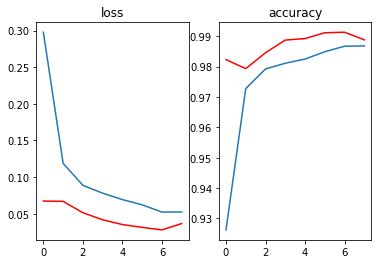

In [28]:
plt.subplot(1,2,1)
plt.title('loss')
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'], 'r')
plt.subplot(1,2,2)
plt.title('accuracy')
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'], 'r')
plt.show()

In [29]:
pre = model.predict(x_test_re)
pre = np.argmax(pre, axis=1)
submission = pd.read_csv('/content/sample_submission.csv')
submission['label'] = pre
submission.to_csv('submission.csv', index=False)